In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(1, "/oak/stanford/groups/paragm/gautam/prospection/K2/src")

In [2]:
import pandas as pd
csv_path = "/oak/stanford/groups/paragm/hazy_backup/data_envs/gmachi/datasets/celldive_lung/GE_Lung/features.csv"
df = pd.read_csv(csv_path)
df.head()


sample_id  cell_id  beta_Catenin        Akt       p21  Erk1_2_pT202_pY204  \
0          3        1      8.083774   9.758093  8.762649            7.346247   
1          3        2      6.615080  10.005109  0.000000            7.438852   
2          3        3      6.980008   9.724827  6.698519            7.680898   
3          3        4      7.894905   9.013194  6.698519            7.317125   
4          3        5      6.058068   9.404261  5.783408            7.355259   

        ERK  Stat3_pY705     Stat3  pHistoneH3  ...  Pankeratin    p4EBP1  \
0  9.105024     7.566043  8.928027         0.0  ...   11.963728  7.968665   
1  9.360746     7.778663  9.045096         0.0  ...   11.229689  8.087964   
2  9.247248     7.864390  9.166019         0.0  ...   12.274720  8.005502   
3  9.139297     7.074882  8.354764         0.0  ...   11.601936  7.155078   
4  8.947499     7.641107  8.863847         0.0  ...   12.415632  7.993327   

   beta_Tubulin       RRM1       PTEN  Perimeter  Eccentricity  \
0           0.0  11.092561  10.894020        214         0.567   
1           0.0   8.922089  11.335440        220         0.838   
2           0.0  10.798124  10.946841        207         0.529   
3           0.0   9.995289  10.155102        178         0.752   
4           0.0  11.064954  10.881523        179         0.822   

   MajorAxisLength  MinorAxisLength  Area_Cell  
0           56.906           46.858       1979  
1           67.594           36.893       1877  
2           50.282           42.670       1510  
3           51.320           33.816       1307  
4           54.710           31.181       1293  

[5 rows x 36 columns]

In [3]:
df.shape

(1375271, 36)

In [4]:
df.columns = [col.upper() for col in df.columns]
df.head()

SAMPLE_ID  CELL_ID  BETA_CATENIN        AKT       P21  ERK1_2_PT202_PY204  \
0          3        1      8.083774   9.758093  8.762649            7.346247   
1          3        2      6.615080  10.005109  0.000000            7.438852   
2          3        3      6.980008   9.724827  6.698519            7.680898   
3          3        4      7.894905   9.013194  6.698519            7.317125   
4          3        5      6.058068   9.404261  5.783408            7.355259   

        ERK  STAT3_PY705     STAT3  PHISTONEH3  ...  PANKERATIN    P4EBP1  \
0  9.105024     7.566043  8.928027         0.0  ...   11.963728  7.968665   
1  9.360746     7.778663  9.045096         0.0  ...   11.229689  8.087964   
2  9.247248     7.864390  9.166019         0.0  ...   12.274720  8.005502   
3  9.139297     7.074882  8.354764         0.0  ...   11.601936  7.155078   
4  8.947499     7.641107  8.863847         0.0  ...   12.415632  7.993327   

   BETA_TUBULIN       RRM1       PTEN  PERIMETER  ECCENTRICITY  \
0           0.0  11.092561  10.894020        214         0.567   
1           0.0   8.922089  11.335440        220         0.838   
2           0.0  10.798124  10.946841        207         0.529   
3           0.0   9.995289  10.155102        178         0.752   
4           0.0  11.064954  10.881523        179         0.822   

   MAJORAXISLENGTH  MINORAXISLENGTH  AREA_CELL  
0           56.906           46.858       1979  
1           67.594           36.893       1877  
2           50.282           42.670       1510  
3           51.320           33.816       1307  
4           54.710           31.181       1293  

[5 rows x 36 columns]

In [5]:
feature_order = ['SAMPLE_ID', 'CELL_ID', 'AKT', 'AMPHIREGULIN', 'BETA_CATENIN', 'BETA_TUBULIN', 'CA9', 'CK5', 'CK7', 'CMET', 'CYCLIN_B', 'ECAD', 'EGFR', 'EGFR_PY1068', 'ERK', 'ERK1_2_PT202_PY204', 'HER2', 'IGF1R', 'NAKATPASE', 'P21', 'P4EBP1', 'PANKERATIN', 'PGSK3BETA', 'PHISTONEH3', 'PHOSPHOTYROSINE', 'PTEN', 'RRM1', 'S6', 'STAT3', 'STAT3_PY705', 'VGFR2', 'AREA_CELL', 'ECCENTRICITY', 'MAJORAXISLENGTH', 'MINORAXISLENGTH', 'PERIMETER']
df = df[feature_order]


In [6]:
df.head()

SAMPLE_ID  CELL_ID        AKT  AMPHIREGULIN  BETA_CATENIN  BETA_TUBULIN  \
0          3        1   9.758093     11.238103      8.083774           0.0   
1          3        2  10.005109     11.115157      6.615080           0.0   
2          3        3   9.724827     11.395263      6.980008           0.0   
3          3        4   9.013194     10.193827      7.894905           0.0   
4          3        5   9.404261     11.008204      6.058068           0.0   

         CA9       CK5  CK7      CMET  ...       RRM1         S6     STAT3  \
0  10.130518  7.957851  0.0  8.984719  ...  11.092561  11.901659  8.928027   
1   9.987988  7.494676  0.0  8.571667  ...   8.922089  12.244041  9.045096   
2  10.468298  8.210884  0.0  8.842903  ...  10.798124  12.345582  9.166019   
3   9.375557  7.354078  0.0  8.551745  ...   9.995289  10.147049  8.354764   
4   9.855363  8.839099  0.0  8.751700  ...  11.064954  11.653882  8.863847   

   STAT3_PY705      VGFR2  AREA_CELL  ECCENTRICITY  MAJORAXISLENGTH  \
0     7.566043  10.456755       1979         0.567           56.906   
1     7.778663  10.268016       1877         0.838           67.594   
2     7.864390  10.164391       1510         0.529           50.282   
3     7.074882   9.292938       1307         0.752           51.320   
4     7.641107   9.899463       1293         0.822           54.710   

   MINORAXISLENGTH  PERIMETER  
0           46.858        214  
1           36.893        220  
2           42.670        207  
3           33.816        178  
4           31.181        179  

[5 rows x 36 columns]

# models

In [7]:
import utils
scaler = utils.deserialize("/oak/stanford/groups/paragm/gautam/prospection/K2/notebooks/spatial-bio/scaler_6-26.obj")
clf = utils.deserialize("/oak/stanford/groups/paragm/gautam/prospection/K2/notebooks/spatial-bio/elasticnet_model_2-13.obj")

/oak/stanford/groups/paragm/gautam/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/oak/stanford/groups/paragm/gautam/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/oak/stanford/groups/paragm/gautam/envs/kkenv/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpick

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


def add_prediction_probabilities(df, feature_order, scaler, clf):
    # Extract feature data (excluding first two columns)
    feature_cols = feature_order[2:]
    X = df[feature_cols].values

    # Scale for prediction
    X_scaled = scaler.transform(X)

    # Predict probabilities
    proba = clf.predict_proba(X_scaled)
    proba_columns = [f'Prob_{i - 1}' for i in range(proba.shape[1])]
    proba_df = pd.DataFrame(proba, columns=proba_columns, index=df.index)

    # Add probabilities to the dataframe
    df = pd.concat([df, proba_df], axis=1)

    # Rescale features in-place to [0, 1] for visualization
    viz_rescaler = MinMaxScaler()
    df[feature_cols] = viz_rescaler.fit_transform(df[feature_cols])
    return df

In [9]:
df = add_prediction_probabilities(df, feature_order, scaler, clf)

In [10]:
df.head()

SAMPLE_ID  CELL_ID       AKT  AMPHIREGULIN  BETA_CATENIN  BETA_TUBULIN  \
0          3        1  0.666060      0.705294      0.607219           0.0   
1          3        2  0.682920      0.697578      0.496897           0.0   
2          3        3  0.663789      0.715157      0.524309           0.0   
3          3        4  0.615215      0.639756      0.593032           0.0   
4          3        5  0.641908      0.690866      0.455057           0.0   

        CA9       CK5  CK7      CMET  ...    Prob_2    Prob_3    Prob_4  \
0  0.721183  0.522840  0.0  0.657125  ...  0.221081  0.113941  0.000011   
1  0.711036  0.492409  0.0  0.626915  ...  0.282621  0.068381  0.000048   
2  0.745229  0.539465  0.0  0.646752  ...  0.373558  0.072235  0.000043   
3  0.667438  0.483172  0.0  0.625458  ...  0.190756  0.025278  0.000316   
4  0.701595  0.580739  0.0  0.640082  ...  0.278959  0.027721  0.000172   

         Prob_5    Prob_6    Prob_7    Prob_8    Prob_9   Prob_10   Prob_11  
0  9.803992e-09  0.021266  0.000099  0.000033  0.009432  0.053203  0.013982  
1  1.757909e-07  0.014637  0.000338  0.000237  0.017940  0.041867  0.023352  
2  7.904785e-08  0.012471  0.000360  0.000041  0.027517  0.040859  0.014078  
3  3.257200e-06  0.015840  0.002464  0.000107  0.004614  0.023551  0.021259  
4  6.427454e-07  0.012443  0.001126  0.000080  0.011855  0.020199  0.016352  

[5 rows x 49 columns]

# coordinates

In [11]:
df_coords = "/oak/stanford/groups/paragm/hazy_backup/data_envs/gmachi/datasets/celldive_lung/GE_Lung/coordinates.csv"
df_coords = pd.read_csv(df_coords)
df_coords.head()

sample_id  cell_id           X           Y
0          3        1  380.110352  281.289062
1          3        2  326.073242  286.100586
2          3        3  465.237305  232.803711
3          3        4   48.115234  549.624023
4          3        5  453.393555  243.537109

In [12]:
df_coords.shape

(1375271, 4)

In [13]:
df_coords.columns = [col.upper() for col in df_coords.columns]
df_coords.head()

SAMPLE_ID  CELL_ID           X           Y
0          3        1  380.110352  281.289062
1          3        2  326.073242  286.100586
2          3        3  465.237305  232.803711
3          3        4   48.115234  549.624023
4          3        5  453.393555  243.537109

In [14]:
df = pd.merge(df, df_coords, on=['SAMPLE_ID', 'CELL_ID'], how='left')

In [15]:
df.shape

(1375271, 51)

# plotting

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_hexbin(df, sample_id, value_column, gridsize=30, cmap='viridis'):
    """
    Plots a hexbin of a given value column for a specific SAMPLE_ID using X, Y coordinates.

    Parameters:
        df (pd.DataFrame): The full dataframe with coordinates and value columns.
        sample_id (str or int): The SAMPLE_ID to filter for.
        value_column (str): The column to color by (e.g. 'AKT', 'Prob_-1').
        gridsize (int): Resolution of the hexbin grid.
        cmap (str): Colormap to use.
    """
    subset = df[df['SAMPLE_ID'] == sample_id]

    if subset.empty:
        print(f"No data found for SAMPLE_ID {sample_id}")
        return

    x = subset['X']
    y = subset['Y']
    c = subset[value_column]

    plt.figure(figsize=(8, 6))
    hb = plt.hexbin(x, y, C=c, reduce_C_function=np.mean,
                    gridsize=gridsize, cmap=cmap, vmin=0, vmax=1)
    plt.colorbar(hb, label=value_column)
    plt.title(f'{value_column} intensity for SAMPLE_ID {sample_id}')
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    
    # Remove plot spines
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.show()




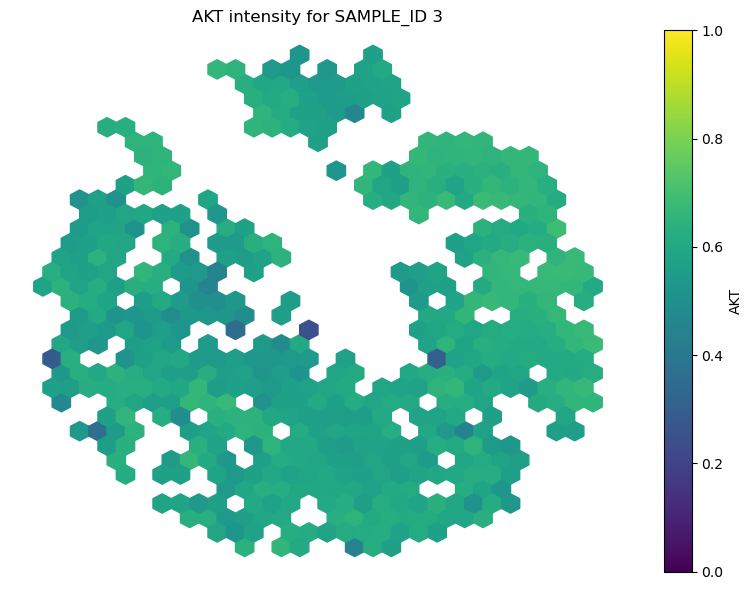

In [17]:
plot_sample_hexbin(df, sample_id=3, value_column='AKT')

In [18]:
def plot_sample_hexbin_ax(ax, df, sample_id, value_column, gridsize=30, cmap='viridis'):
    """
    Draws a hexbin plot of a value column on a provided Axes object.
    Returns the hexbin object so a colorbar can be attached.
    """
    subset = df[df['SAMPLE_ID'] == sample_id]

    if subset.empty:
        ax.set_title(f"No data for {sample_id}", fontsize=9)
        ax.axis('off')
        return None

    x = subset['X']
    y = subset['Y']
    c = subset[value_column]

    hb = ax.hexbin(x, y, C=c, reduce_C_function=np.mean,
                   gridsize=gridsize, cmap=cmap, vmin=0, vmax=1)
    ax.set_title(value_column, fontsize=8)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    for spine in ax.spines.values():
        spine.set_visible(False)

    return hb



# def plot_sample_report_card(df, sample_id, feature_order, gridsize=30, cmap='viridis'):
#     """
#     Creates a multi-panel hexbin plot report for a given SAMPLE_ID,
#     showing all prediction probabilities and input features.
#     Leaves one blank subplot between probabilities and features.
#     """
#     prob_cols = [col for col in df.columns if col.startswith('Prob_')]
#     feature_cols = feature_order[2:]

#     n_cols = 7
#     n_prob = len(prob_cols)
#     gap_index = n_prob  # we'll skip this index to leave space

#     n_features = len(feature_cols)
#     total_slots = n_prob + 1 + n_features  # +1 for the gap
#     n_rows = int(np.ceil(total_slots / n_cols))

#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
#     axes = axes.flatten()

#     # Plot probabilities
#     for i, col in enumerate(prob_cols):
#         plot_sample_hexbin_ax(axes[i], df, sample_id, col, gridsize=gridsize, cmap=cmap)

#     # Leave a blank slot at the end of row 2
#     axes[gap_index].axis('off')

#     # Plot features starting after the gap
#     for j, col in enumerate(feature_cols):
#         ax_index = gap_index + 1 + j
#         plot_sample_hexbin_ax(axes[ax_index], df, sample_id, col, gridsize=gridsize, cmap=cmap)

#     # Turn off any remaining unused axes
#     for k in range(gap_index + 1 + len(feature_cols), len(axes)):
#         axes[k].axis('off')

#     plt.suptitle(f'Sample Report Card: {sample_id}', fontsize=16)
#     plt.tight_layout(rect=[0, 0, 1, 0.97])
#     plt.show()

def plot_sample_report_card(df, sample_id, feature_order, gridsize=30, cmap='viridis'):
    """
    Creates a multi-panel hexbin plot report for a given SAMPLE_ID,
    showing all prediction probabilities and input features.
    Adds a colorbar to any plot that is in the last column of each row.
    """
    prob_cols = [col for col in df.columns if col.startswith('Prob_')]
    feature_cols = feature_order[2:]

    n_cols = 7
    n_prob = len(prob_cols)
    gap_index = n_prob  # we'll skip this index to leave space

    n_features = len(feature_cols)
    total_slots = n_prob + 1 + n_features  # +1 for the gap
    n_rows = int(np.ceil(total_slots / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.2, n_rows * 2.2), constrained_layout=True)
    axes = axes.flatten()

    # Plot probabilities
    for i, col in enumerate(prob_cols):
        hb = plot_sample_hexbin_ax(axes[i], df, sample_id, col, gridsize=gridsize, cmap=cmap)
        if i % n_cols == n_cols - 1 and hb is not None:
            fig.colorbar(hb, ax=axes[i], orientation='vertical', fraction=0.046, pad=0.04)

    # Leave a blank slot between probabilities and features
    axes[gap_index].axis('off')

    # Plot features after the gap
    for j, col in enumerate(feature_cols):
        ax_index = gap_index + 1 + j
        hb = plot_sample_hexbin_ax(axes[ax_index], df, sample_id, col, gridsize=gridsize, cmap=cmap)
        if ax_index % n_cols == n_cols - 1 and hb is not None:
            fig.colorbar(hb, ax=axes[ax_index], orientation='vertical', fraction=0.046, pad=0.04)

    # Turn off any unused axes
    for k in range(gap_index + 1 + len(feature_cols), len(axes)):
        axes[k].axis('off')

    plt.suptitle(f'Sample Report Card: {sample_id}', fontsize=16)
    plt.show()


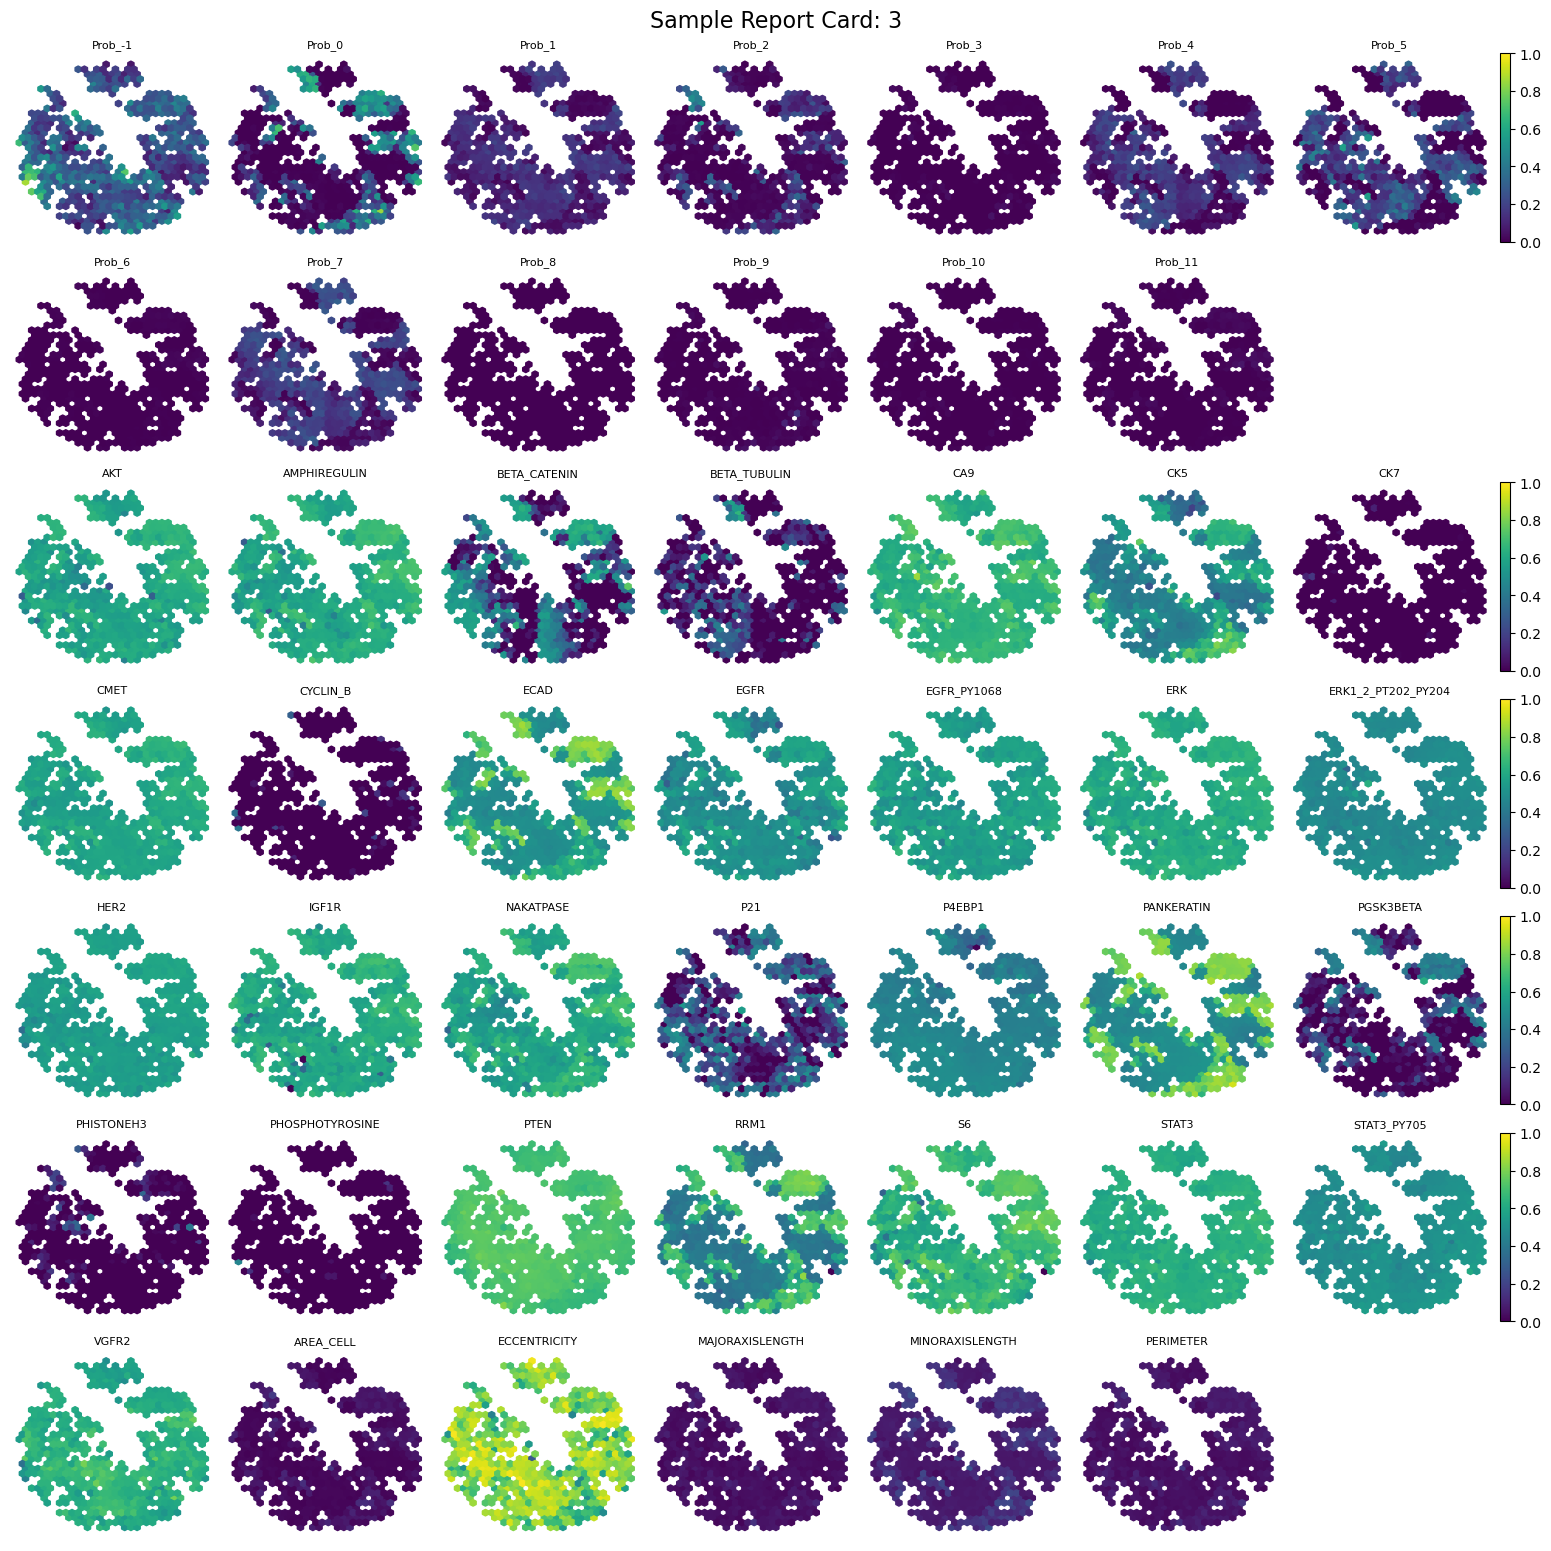

In [19]:
plot_sample_report_card(df, sample_id=3, feature_order=feature_order)


In [20]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

def compute_hexbin_correlation(df, sample_id, col1, col2, gridsize=30):
    """
    Computes the Pearson correlation between two columns aggregated in hexbin bins.

    Parameters:
        df (DataFrame): The full dataframe.
        sample_id (str or int): The SAMPLE_ID to filter by.
        col1 (str): First column (e.g. 'Prob_0').
        col2 (str): Second column (e.g. 'ECAD').
        gridsize (int): Hexbin resolution.

    Returns:
        corr (float): Pearson correlation between the two binned values.
        n_bins (int): Number of bins included in the correlation.
    """
    subset = df[df['SAMPLE_ID'] == sample_id]
    if subset.empty:
        return np.nan, 0

    x = subset['X'].values
    y = subset['Y'].values
    v1 = subset[col1].values
    v2 = subset[col2].values
    extent=[x.min(), x.max(), y.min(), y.max()]	

    # Compute hexbin coordinates and bin indices
    hb = plt.hexbin(x, y, C=v1, gridsize=gridsize, reduce_C_function=np.mean, extent=extent)
    plt.close()  # don't display the plot

    # Get bin indices (same for both columns)
    offsets = hb.get_offsets()
    verts1 = hb.get_array()

    # Create a lookup table of bins to mean values for col1
    bin_ids = hb.get_offsets()
    col1_vals = hb.get_array()

    # Now recompute col2 on the same binning
    # Use the same binning by assigning bin numbers manually
    xybins = hb.get_offsets()
    xedges = hb.get_offsets()[:, 0]
    yedges = hb.get_offsets()[:, 1]

    # Manual approach for consistent binning of col2
    hb2 = plt.hexbin(x, y, C=v2, gridsize=gridsize, reduce_C_function=np.mean, extent=extent)
    plt.close()
    col2_vals = hb2.get_array()

    # Drop any bins with missing values
    mask = (~np.isnan(col1_vals)) & (~np.isnan(col2_vals))
    col1_vals = col1_vals[mask]
    col2_vals = col2_vals[mask]

    if len(col1_vals) < 2:
        return np.nan, len(col1_vals)

    corr, _ = pearsonr(col1_vals, col2_vals)
    return corr, len(col1_vals)


In [21]:
def compute_all_hexbin_correlations(df, sample_id, prob_cols, feature_cols, gridsize=30):
    """
    Computes Pearson correlations between each probability column and each feature column.
    Returns a DataFrame of results.
    """
    results = []

    for prob in prob_cols:
        for feat in feature_cols:
            corr, n_bins = compute_hexbin_correlation(df, sample_id, prob, feat, gridsize=gridsize)
            results.append({
                'sample_id': sample_id,
                'probability': prob,
                'feature': feat,
                'pearson_r': corr,
                'n_bins': n_bins
            })

    return pd.DataFrame(results)


In [22]:
prob_cols = [col for col in df.columns if col.startswith('Prob_')]
feature_cols = feature_order[2:]  # e.g., 34 features

cor_df = compute_all_hexbin_correlations(df, sample_id=3, prob_cols=prob_cols, feature_cols=feature_cols)
cor_df


sample_id probability          feature  pearson_r  n_bins
0            3     Prob_-1              AKT   0.094726     530
1            3     Prob_-1     AMPHIREGULIN   0.089215     530
2            3     Prob_-1     BETA_CATENIN   0.395466     530
3            3     Prob_-1     BETA_TUBULIN   0.096251     530
4            3     Prob_-1              CA9   0.084594     530
..         ...         ...              ...        ...     ...
437          3     Prob_11        AREA_CELL   0.597840     530
438          3     Prob_11     ECCENTRICITY  -0.223692     530
439          3     Prob_11  MAJORAXISLENGTH   0.535864     530
440          3     Prob_11  MINORAXISLENGTH   0.617228     530
441          3     Prob_11        PERIMETER   0.597672     530

[442 rows x 5 columns]

In [23]:
cor_matrix = cor_df.pivot(index='probability', columns='feature', values='pearson_r')

In [24]:
cor_matrix.shape

(13, 34)

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def plot_correlation_heatmap_matplotlib_sorted(cor_df, figsize=(14, 6), cmap='coolwarm'):
    """
    Plots a heatmap of correlations, sorted by strongest absolute correlations.
    """
    # Pivot to matrix
    cor_matrix = cor_df.pivot(index='probability', columns='feature', values='pearson_r')

    # Compute sorting order
    row_order = cor_matrix.abs().max(axis=1).sort_values(ascending=False).index
    col_order = cor_matrix.abs().max(axis=0).sort_values(ascending=False).index

    # Reorder matrix
    cor_matrix_sorted = cor_matrix.loc[row_order, col_order]

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(cor_matrix_sorted.values, aspect='auto', cmap=cmap, vmin=-1, vmax=1)

    # Tick labels
    ax.set_xticks(np.arange(cor_matrix_sorted.shape[1]))
    ax.set_yticks(np.arange(cor_matrix_sorted.shape[0]))
    ax.set_xticklabels(cor_matrix_sorted.columns, rotation=90, fontsize=8)
    ax.set_yticklabels(cor_matrix_sorted.index, fontsize=9)

    # Colorbar
    cbar = fig.colorbar(cax, ax=ax)
    cbar.set_label('Pearson r')

    ax.set_title('Hexbin Pearson Correlation: Probabilities vs Features')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Probability')
    plt.tight_layout()
    plt.show()



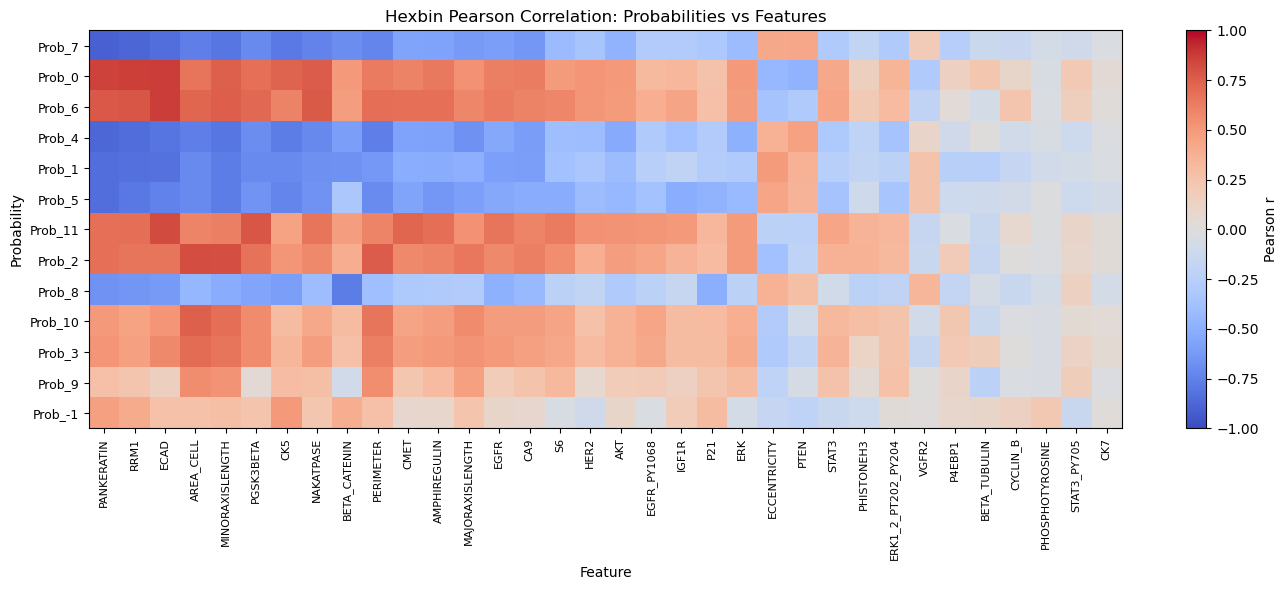

In [26]:
plot_correlation_heatmap_matplotlib_sorted(cor_df)


# Extend to all samples

In [27]:
from utils import serialize
import os

In [28]:
sample_ids = list(set(list(df["SAMPLE_ID"])))
print("total samples:", len(sample_ids))
prob_cols = [col for col in df.columns if col.startswith('Prob_')]
feature_cols = feature_order[2:]  # e.g., 34 features

for i,si in enumerate(sample_ids):
    out_path = "/oak/stanford/groups/paragm/gautam/outputs/" + str(si) + ".mat"
    if not os.path.exists(out_path):
        print(i,si)
        cor_df = compute_all_hexbin_correlations(df, sample_id=si, prob_cols=prob_cols, feature_cols=feature_cols)
        cor_matrix = cor_df.pivot(index='probability', columns='feature', values='pearson_r')
        serialize(cor_matrix, out_path)
    

total samples: 254


In [29]:
from utils import deserialize
ex_path = "/oak/stanford/groups/paragm/gautam/outputs/3.mat"
ex_mat = deserialize(ex_path)
full_mat = np.zeros_like(ex_mat)
full_mat.shape

(13, 34)

In [30]:
ex_mat.index

Index(['Prob_-1', 'Prob_0', 'Prob_1', 'Prob_10', 'Prob_11', 'Prob_2', 'Prob_3',
       'Prob_4', 'Prob_5', 'Prob_6', 'Prob_7', 'Prob_8', 'Prob_9'],
      dtype='object', name='probability')

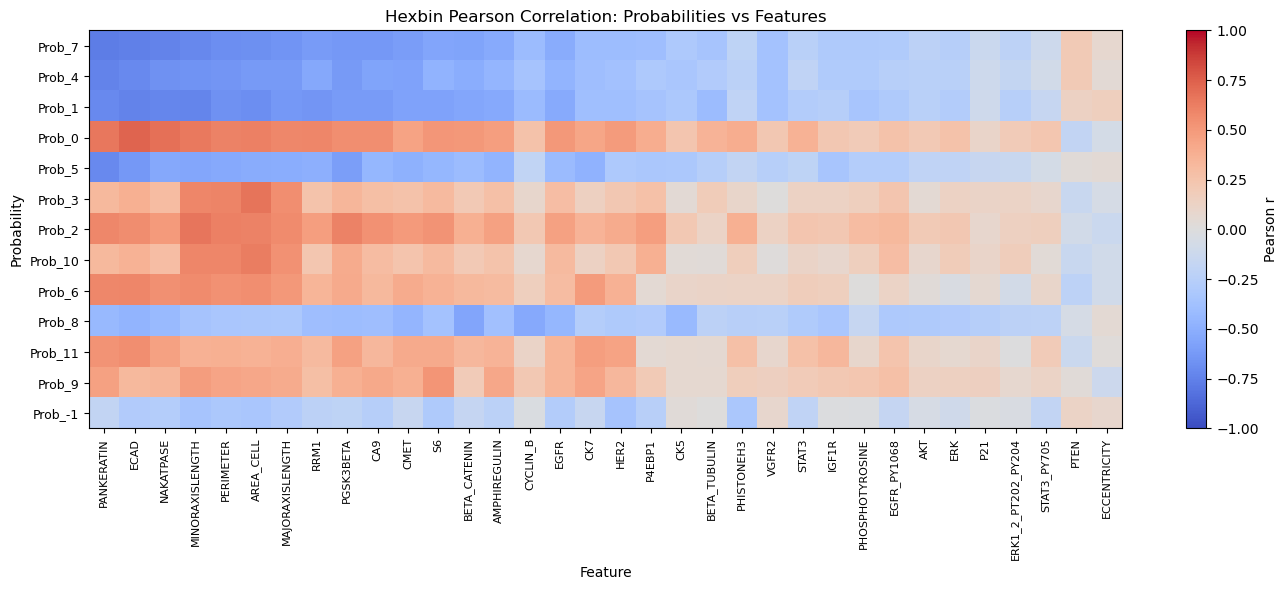

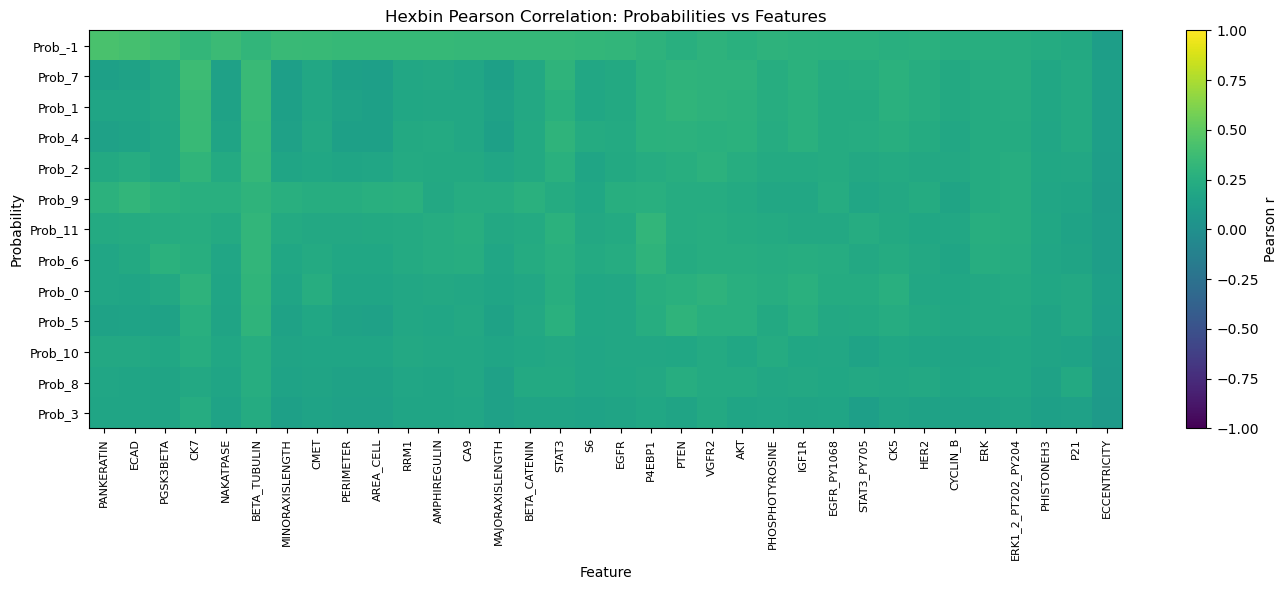

In [31]:
import numpy as np
import pandas as pd
from utils import deserialize

# --- Load and stack correlation matrices ---
sample_ids = list(set(list(df["SAMPLE_ID"])))
ex_mat = deserialize(f"/oak/stanford/groups/paragm/gautam/outputs/{sample_ids[0]}.mat")
matrix_shape = ex_mat.shape
all_matrices = np.zeros((len(sample_ids), *matrix_shape))

for i, si in enumerate(sample_ids):
    mat = deserialize(f"/oak/stanford/groups/paragm/gautam/outputs/{si}.mat")
    all_matrices[i] = mat

# --- Compute statistics ---
mean_matrix = np.mean(all_matrices, axis=0)
std_matrix = np.std(all_matrices, axis=0)

# --- Convert to long-form DataFrame ---
# Assumes rows = probabilities, cols = features
probabilities = list(ex_mat.index)
features = list(ex_mat.columns)

def matrix_to_df(matrix, row_labels, col_labels):
    rows, cols = np.meshgrid(row_labels, col_labels, indexing='ij')
    return pd.DataFrame({
        'probability': rows.ravel(),
        'feature': cols.ravel(),
        'pearson_r': matrix.ravel()
    })

mean_df = matrix_to_df(mean_matrix, probabilities, features)
std_df = matrix_to_df(std_matrix, probabilities, features)

# --- Plot heatmaps ---
plot_correlation_heatmap_matplotlib_sorted(mean_df, figsize=(14, 6), cmap='coolwarm')
plot_correlation_heatmap_matplotlib_sorted(std_df, figsize=(14, 6), cmap='viridis')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_annotated_heatmap(cor_df, title="", figsize=(14, 6), cmap='coolwarm', vmin=-1, vmax=1, annot_fmt=".2f"):
    """
    Plots an annotated heatmap from a long-form DataFrame with columns:
    ['probability', 'feature', 'pearson_r'], sorted by absolute correlation magnitude.
    """
    # Pivot to matrix
    cor_matrix = cor_df.pivot(index='probability', columns='feature', values='pearson_r')

    # Sort rows and columns by strongest absolute correlations
    row_order = cor_matrix.abs().max(axis=1).sort_values(ascending=False).index
    col_order = cor_matrix.abs().max(axis=0).sort_values(ascending=False).index
    cor_matrix_sorted = cor_matrix.loc[row_order, col_order]

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        cor_matrix_sorted,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        annot=True,
        fmt=annot_fmt,
        annot_kws={"size": 7},
        cbar_kws={'label': 'Pearson r'},
        linewidths=0.5,
        linecolor='gray'
    )

    ax.set_title(title)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Probability")
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()


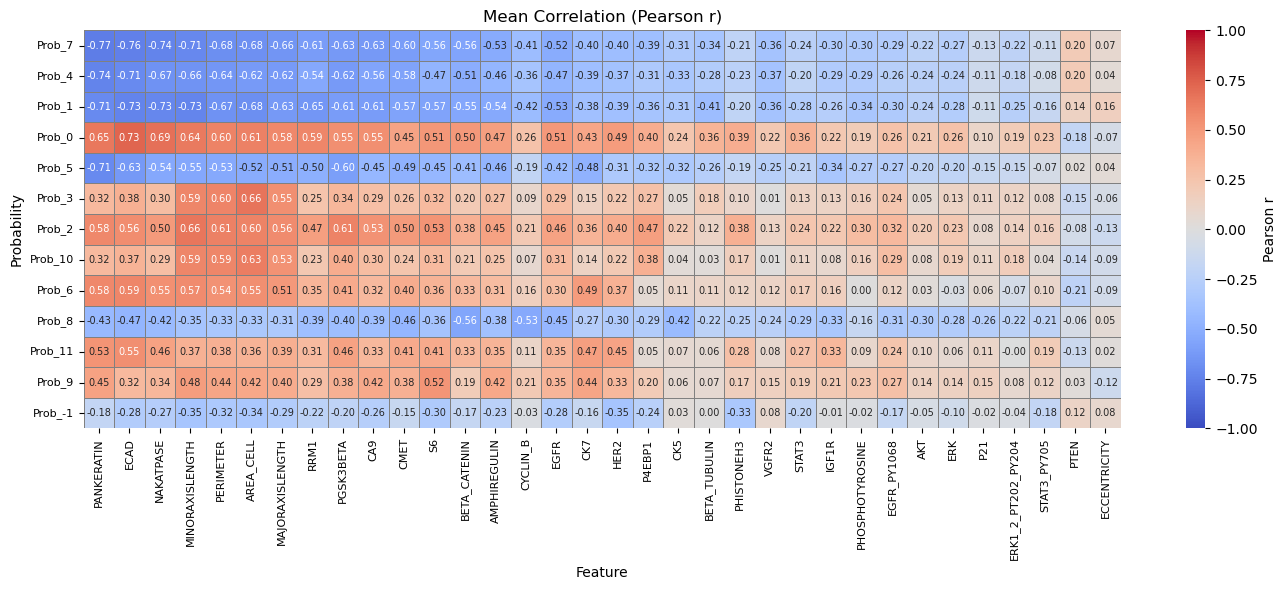

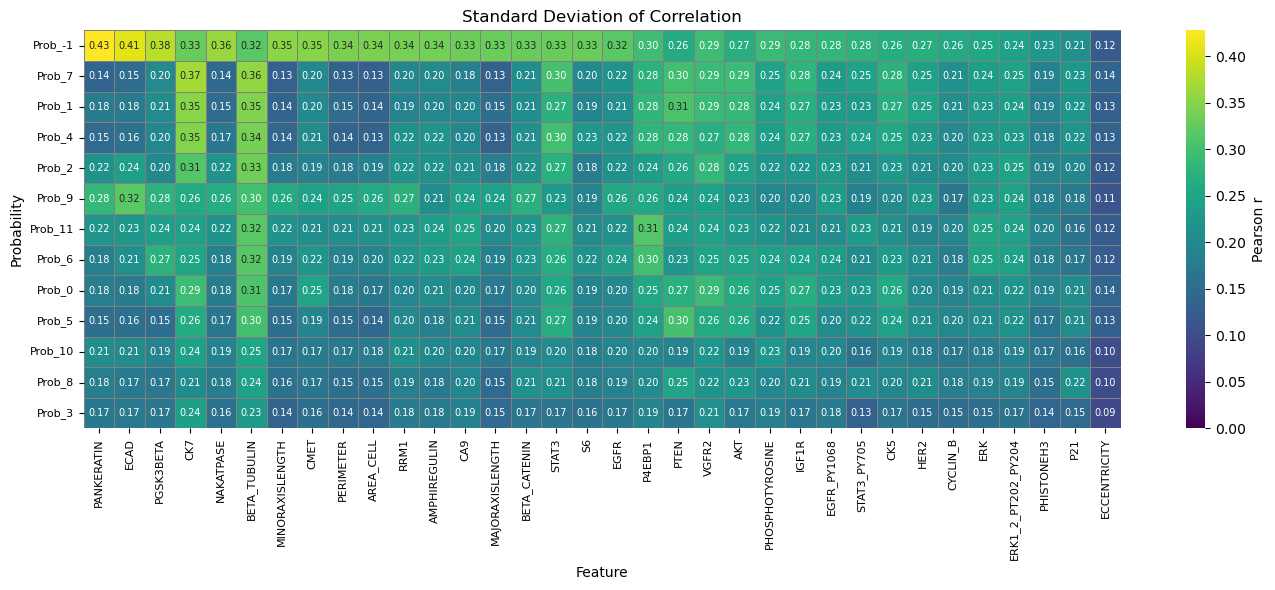

In [33]:
import numpy as np
import pandas as pd
from utils import deserialize

# --- Load and stack correlation matrices ---
sample_ids = list(set(list(df["SAMPLE_ID"])))
ex_mat = deserialize(f"/oak/stanford/groups/paragm/gautam/outputs/{sample_ids[0]}.mat")
matrix_shape = ex_mat.shape
all_matrices = np.zeros((len(sample_ids), *matrix_shape))

for i, si in enumerate(sample_ids):
    mat = deserialize(f"/oak/stanford/groups/paragm/gautam/outputs/{si}.mat")
    all_matrices[i] = mat

# --- Compute statistics ---
mean_matrix = np.mean(all_matrices, axis=0)
std_matrix = np.std(all_matrices, axis=0)

# --- Convert to long-form DataFrame ---
# Assumes rows = probabilities, cols = features
probabilities = list(ex_mat.index)
features = list(ex_mat.columns)

def matrix_to_df(matrix, row_labels, col_labels):
    rows, cols = np.meshgrid(row_labels, col_labels, indexing='ij')
    return pd.DataFrame({
        'probability': rows.ravel(),
        'feature': cols.ravel(),
        'pearson_r': matrix.ravel()
    })

mean_df = matrix_to_df(mean_matrix, probabilities, features)
std_df = matrix_to_df(std_matrix, probabilities, features)

# --- Plot heatmaps ---
plot_annotated_heatmap(mean_df, title="Mean Correlation (Pearson r)", cmap='coolwarm', vmin=-1, vmax=1)
plot_annotated_heatmap(std_df, title="Standard Deviation of Correlation", cmap='viridis', vmin=0, vmax=None)


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_annotated_heatmap(cor_df, title="", figsize=(14, 6), cmap='coolwarm', vmin=-1, vmax=1, bold_thresh=0.5, fmt=".2f"):
    """
    Plots an annotated heatmap with bold values for cells with |value| > bold_thresh.
    """
    # Pivot to matrix
    cor_matrix = cor_df.pivot(index='probability', columns='feature', values='pearson_r')

    # Sort rows/columns by max abs value
    row_order = cor_matrix.abs().max(axis=1).sort_values(ascending=False).index
    col_order = cor_matrix.abs().max(axis=0).sort_values(ascending=False).index
    cor_matrix_sorted = cor_matrix.loc[row_order, col_order]

    # Plot base heatmap
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        cor_matrix_sorted,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar_kws={'label': 'Pearson r'},
        linewidths=0.5,
        linecolor='gray',
        annot=False  # we'll manually annotate
    )

    # Annotate manually with boldface for high values
    for i in range(cor_matrix_sorted.shape[0]):
        for j in range(cor_matrix_sorted.shape[1]):
            val = cor_matrix_sorted.values[i, j]
            text = format(val, fmt)
            weight = 'bold' if abs(val) > bold_thresh else 'normal'
            ax.text(j + 0.5, i + 0.5, text,
                    ha='center', va='center', fontsize=7, fontweight=weight, color='black')

    # Ticks and labels
    ax.set_xticks(np.arange(cor_matrix_sorted.shape[1]) + 0.5)
    ax.set_yticks(np.arange(cor_matrix_sorted.shape[0]) + 0.5)
    ax.set_xticklabels(cor_matrix_sorted.columns, rotation=90, fontsize=8)
    ax.set_yticklabels(cor_matrix_sorted.index, fontsize=8)
    
    ax.set_title(title)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Probability")
    plt.tight_layout()
    plt.show()


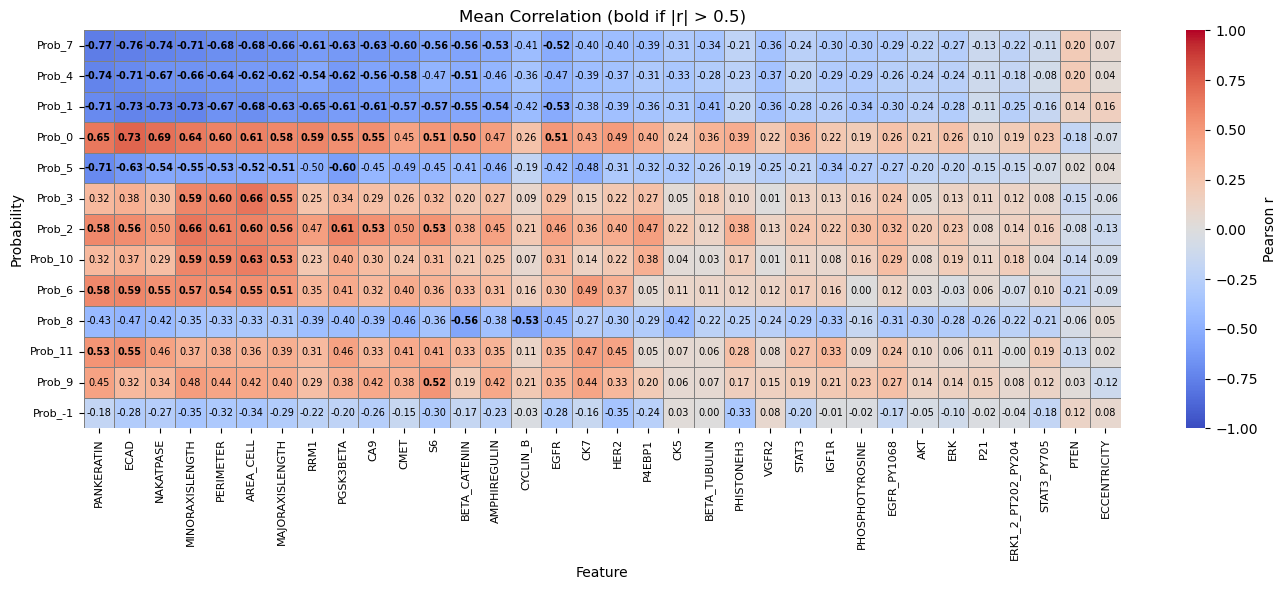

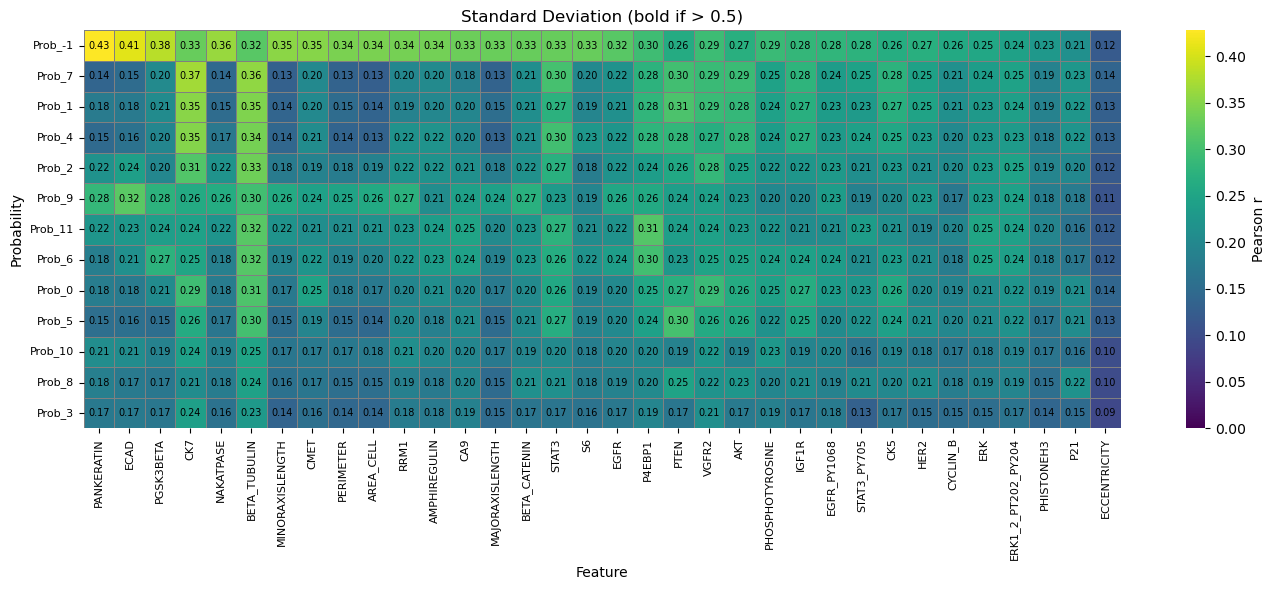

In [35]:
import numpy as np
import pandas as pd
from utils import deserialize

# --- Load and stack correlation matrices ---
sample_ids = list(set(list(df["SAMPLE_ID"])))
ex_mat = deserialize(f"/oak/stanford/groups/paragm/gautam/outputs/{sample_ids[0]}.mat")
matrix_shape = ex_mat.shape
all_matrices = np.zeros((len(sample_ids), *matrix_shape))

for i, si in enumerate(sample_ids):
    mat = deserialize(f"/oak/stanford/groups/paragm/gautam/outputs/{si}.mat")
    all_matrices[i] = mat

# --- Compute statistics ---
mean_matrix = np.mean(all_matrices, axis=0)
std_matrix = np.std(all_matrices, axis=0)

# --- Convert to long-form DataFrame ---
# Assumes rows = probabilities, cols = features
probabilities = list(ex_mat.index)
features = list(ex_mat.columns)

def matrix_to_df(matrix, row_labels, col_labels):
    rows, cols = np.meshgrid(row_labels, col_labels, indexing='ij')
    return pd.DataFrame({
        'probability': rows.ravel(),
        'feature': cols.ravel(),
        'pearson_r': matrix.ravel()
    })

mean_df = matrix_to_df(mean_matrix, probabilities, features)
std_df = matrix_to_df(std_matrix, probabilities, features)

# --- Plot heatmaps ---
plot_annotated_heatmap(mean_df, title="Mean Correlation (bold if |r| > 0.5)", cmap='coolwarm', vmin=-1, vmax=1)
plot_annotated_heatmap(std_df, title="Standard Deviation (bold if > 0.5)", cmap='viridis', vmin=0, vmax=None)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist

def plot_clustered_heatmap(cor_df, title="", figsize=(14, 6), cmap='coolwarm', vmin=-1, vmax=1, bold_thresh=0.5, fmt=".2f"):
    """
    Plots a heatmap with hierarchical clustering of rows and columns.
    """
    # Pivot to matrix
    cor_matrix = cor_df.pivot(index='probability', columns='feature', values='pearson_r')

    # --- Cluster rows (populations) ---
    row_linkage = linkage(pdist(cor_matrix.values, metric='euclidean'), method='average')
    row_order = cor_matrix.index[leaves_list(row_linkage)]

    # --- Cluster columns (features) ---
    col_linkage = linkage(pdist(cor_matrix.values.T, metric='euclidean'), method='average')
    col_order = cor_matrix.columns[leaves_list(col_linkage)]

    # Reorder matrix
    cor_matrix_sorted = cor_matrix.loc[row_order, col_order]

    # --- Plot base heatmap ---
    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        cor_matrix_sorted,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar_kws={'label': 'Pearson r'},
        linewidths=0.5,
        linecolor='gray',
        annot=False
    )

    # Annotate manually with boldface for high values
    for i in range(cor_matrix_sorted.shape[0]):
        for j in range(cor_matrix_sorted.shape[1]):
            val = cor_matrix_sorted.values[i, j]
            text = format(val, fmt)
            weight = 'bold' if abs(val) > bold_thresh else 'normal'
            ax.text(j + 0.5, i + 0.5, text,
                    ha='center', va='center', fontsize=7, fontweight=weight, color='black')

    # Ticks and labels
    ax.set_xticks(np.arange(cor_matrix_sorted.shape[1]) + 0.5)
    ax.set_yticks(np.arange(cor_matrix_sorted.shape[0]) + 0.5)
    ax.set_xticklabels(cor_matrix_sorted.columns, rotation=90, fontsize=8)
    ax.set_yticklabels(cor_matrix_sorted.index, fontsize=8)
    
    ax.set_title(title)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Probability (clustered)")
    plt.tight_layout()
    plt.show()


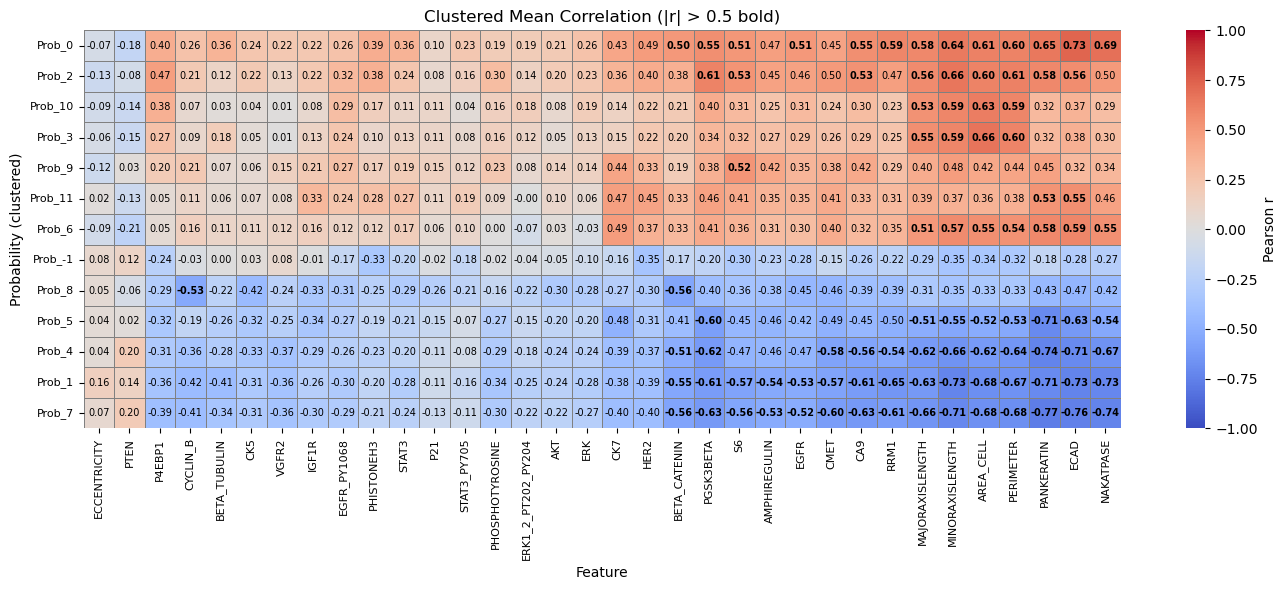

In [37]:
plot_clustered_heatmap(mean_df, title="Clustered Mean Correlation (|r| > 0.5 bold)")

<Figure size 640x480 with 0 Axes>

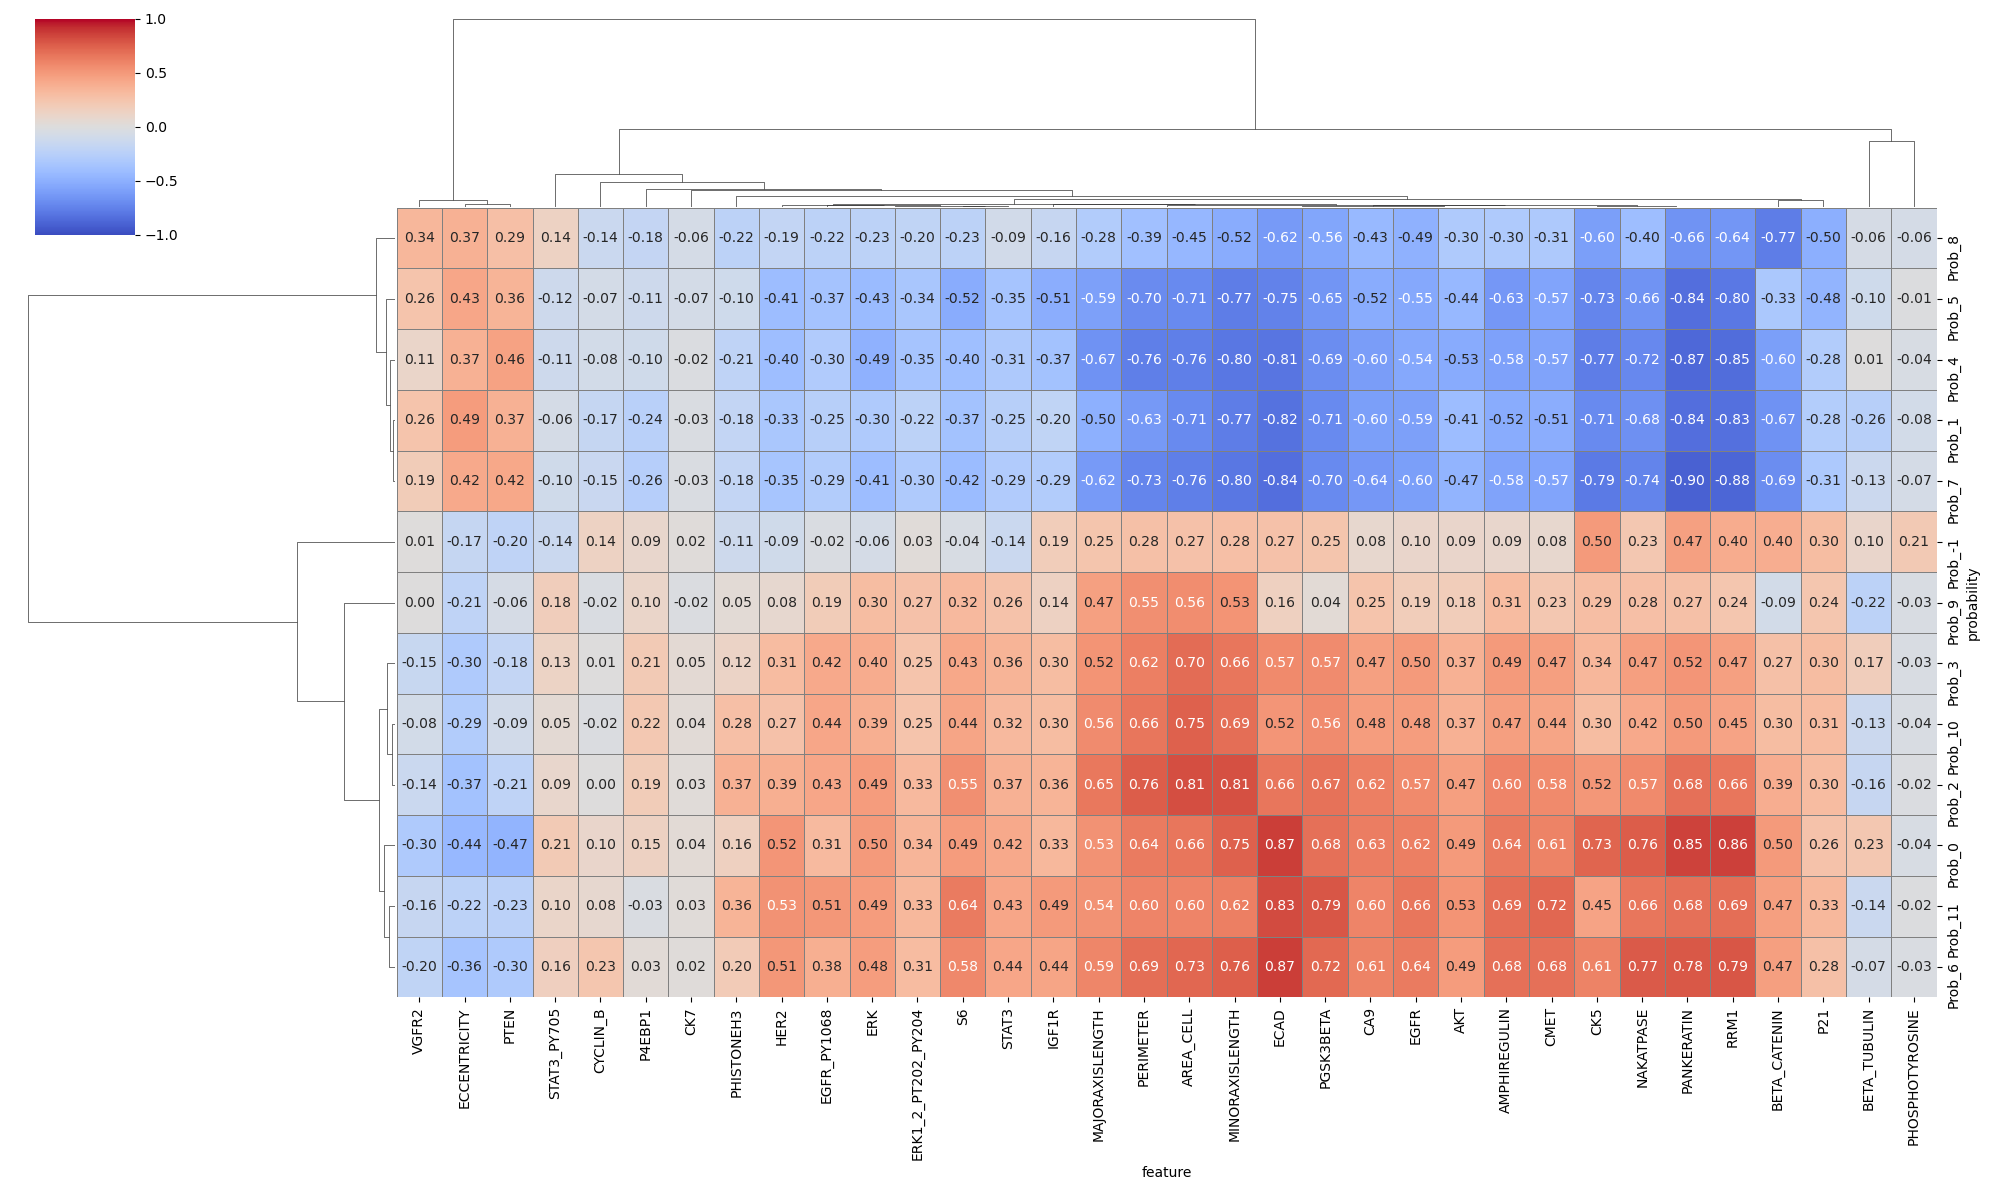

In [40]:
plt.figure()
sns.clustermap(
    cor_matrix,
    method='average',
    metric='correlation',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='gray',
    figsize=(20, 12),
    annot=True, fmt=".2f"
)
plt.show()

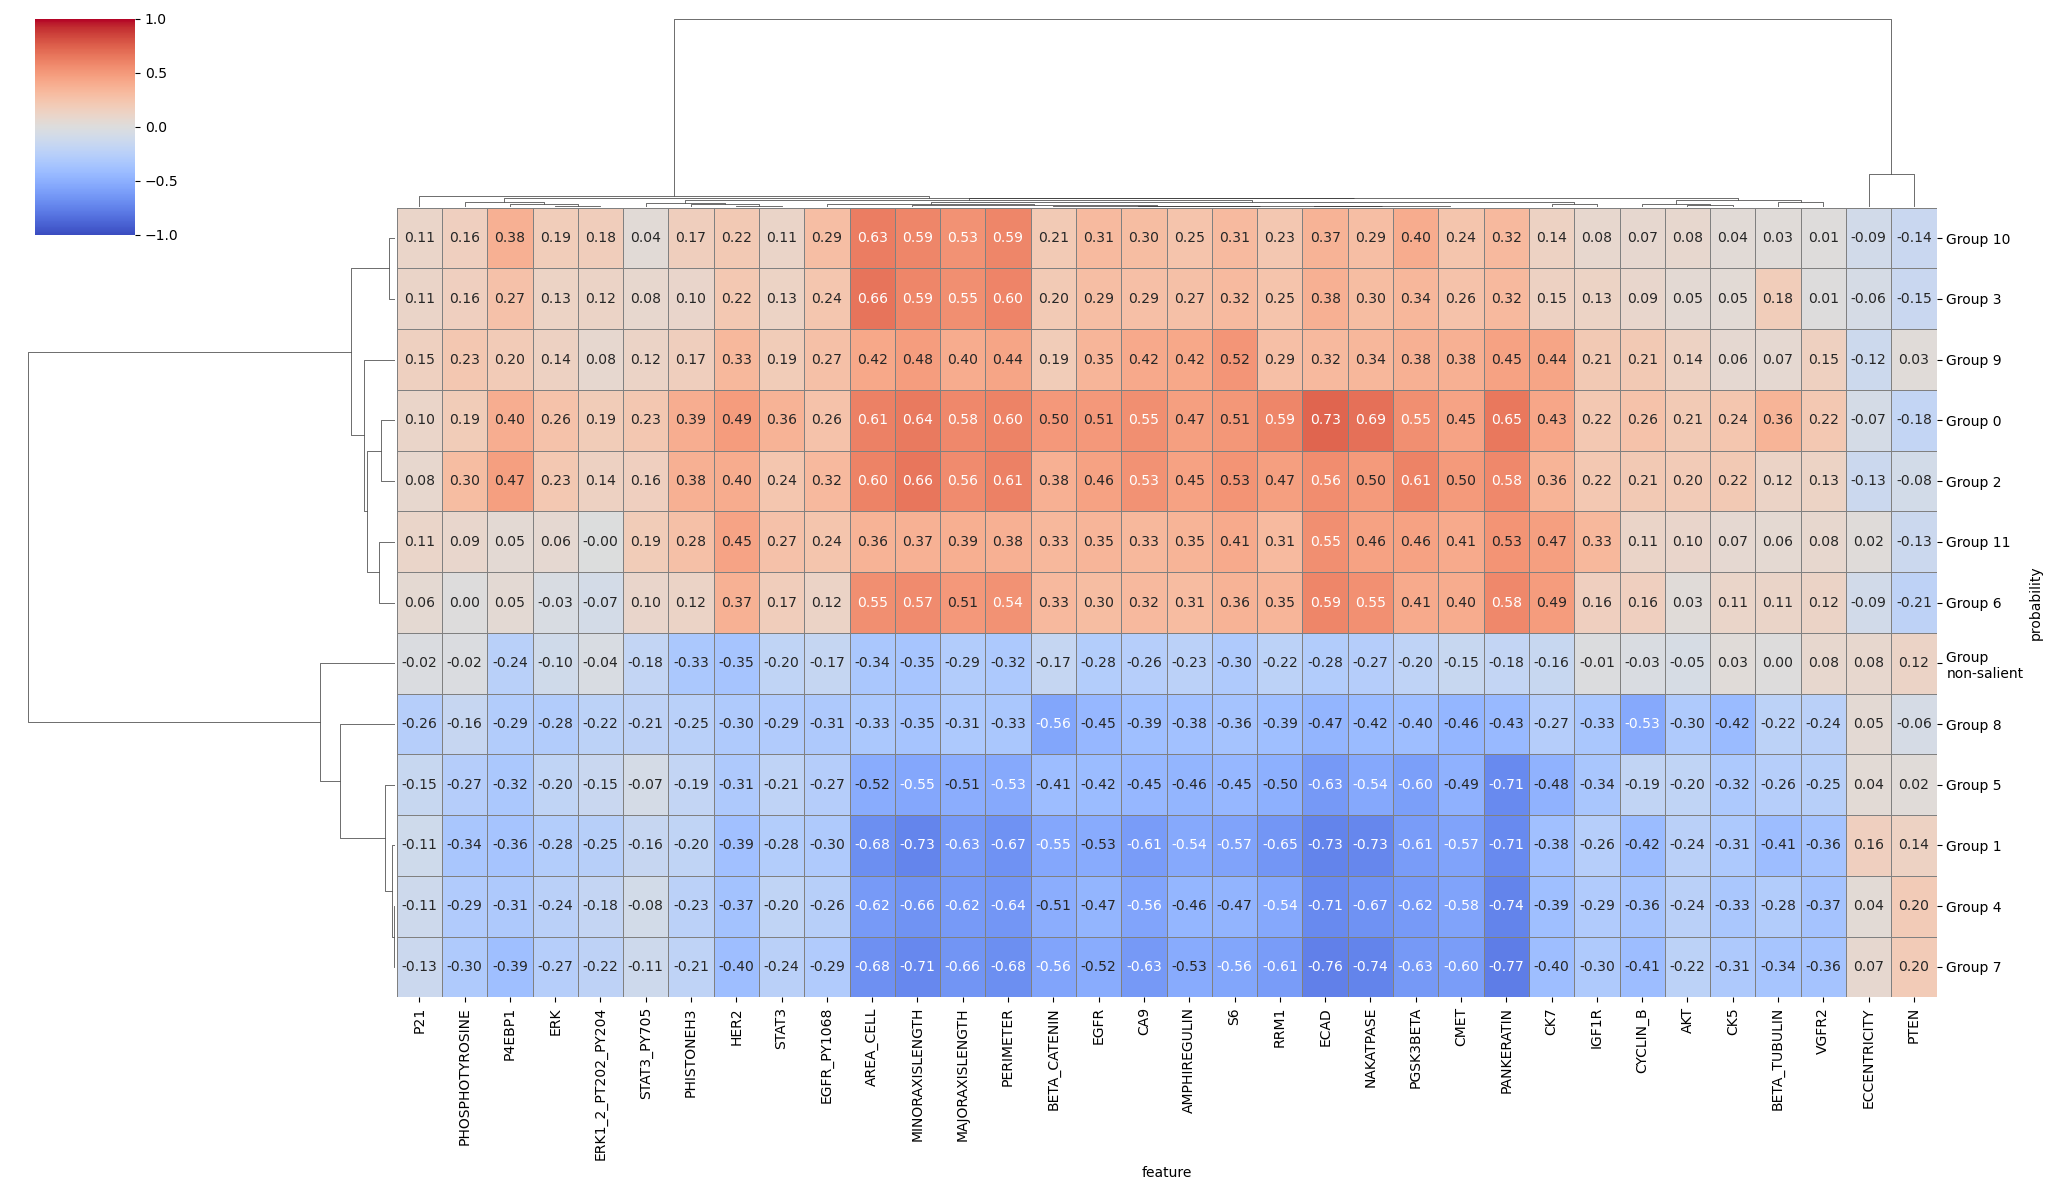

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot to matrix
cor_matrix = mean_df.pivot(index='probability', columns='feature', values='pearson_r')

# --- Clustered heatmap ---
g = sns.clustermap(
    cor_matrix,
    method='average',
    metric='correlation',  # clustering by correlation similarity
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='gray',
    figsize=(20, 12),
    annot=True,
    fmt=".2f"
)

# --- Format y-axis labels ---
# Extract original labels after clustering
new_labels = g.data2d.index.tolist()

# Convert "Prob_X" → P(s=1,GX)
formatted_labels = []
for lbl in new_labels:
    try:
        # extract the number after "Prob_"
        idx = lbl.split("_")[1]
    except IndexError:
        idx = lbl
    if idx == str(-1):
        idx = "\nnon-salient"
    formatted_labels.append(f"Group {idx}")

# Apply horizontal rotation and update text
g.ax_heatmap.set_yticklabels(formatted_labels, rotation=0)

plt.show()
